In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [2]:
# Cargar los datos desde un archivo CSV
archivo_csv = 'mejores_modelos_por_etiqueta_subset.csv'  # Reemplaza con la ruta de tu archivo CSV
df = pd.read_csv(archivo_csv, sep=';')

In [3]:
# Función para convertir un porcentaje en string a float
def convertir_a_float(porcentaje_str):
    # Eliminar el signo '%' y convertir a float
    return float(porcentaje_str.replace('%', '').strip()) / 100.0

# Cargar el archivo CSV
archivo_csv = 'mejores_modelos_por_etiqueta_subset.csv'  # Asegúrate de que la ruta es correcta
df = pd.read_csv(archivo_csv, sep=';')

# Crear un diccionario vacío para almacenar los datos
diccionario_resultado = {}

# Recorrer todas las filas del DataFrame
for _, fila in df.iterrows():
    # Usamos el valor de 'subset' y 'etiqueta' como claves
    subset = fila['subset']
    etiqueta = fila['etiqueta']
    
    # Crear un diccionario con las métricas, convirtiendo los porcentajes a float
    metrica_dict = {
        'Accuracy Test': (fila['Accuracy Test']),
        'Mean Sensibilidad Test': (fila['Sensibilidad Test']),
        'Mean Especificidad Test': (fila['Especificidad Test']),
        'Algoritmo': fila['algoritmo']
    }
    
    # Si el subset ya existe en el diccionario, añadimos la etiqueta
    if subset not in diccionario_resultado:
        diccionario_resultado[subset] = {}
    
    # Guardar las métricas bajo la etiqueta correspondiente
    diccionario_resultado[subset][etiqueta] = metrica_dict

# Mostrar el diccionario resultado
#print(diccionario_resultado)


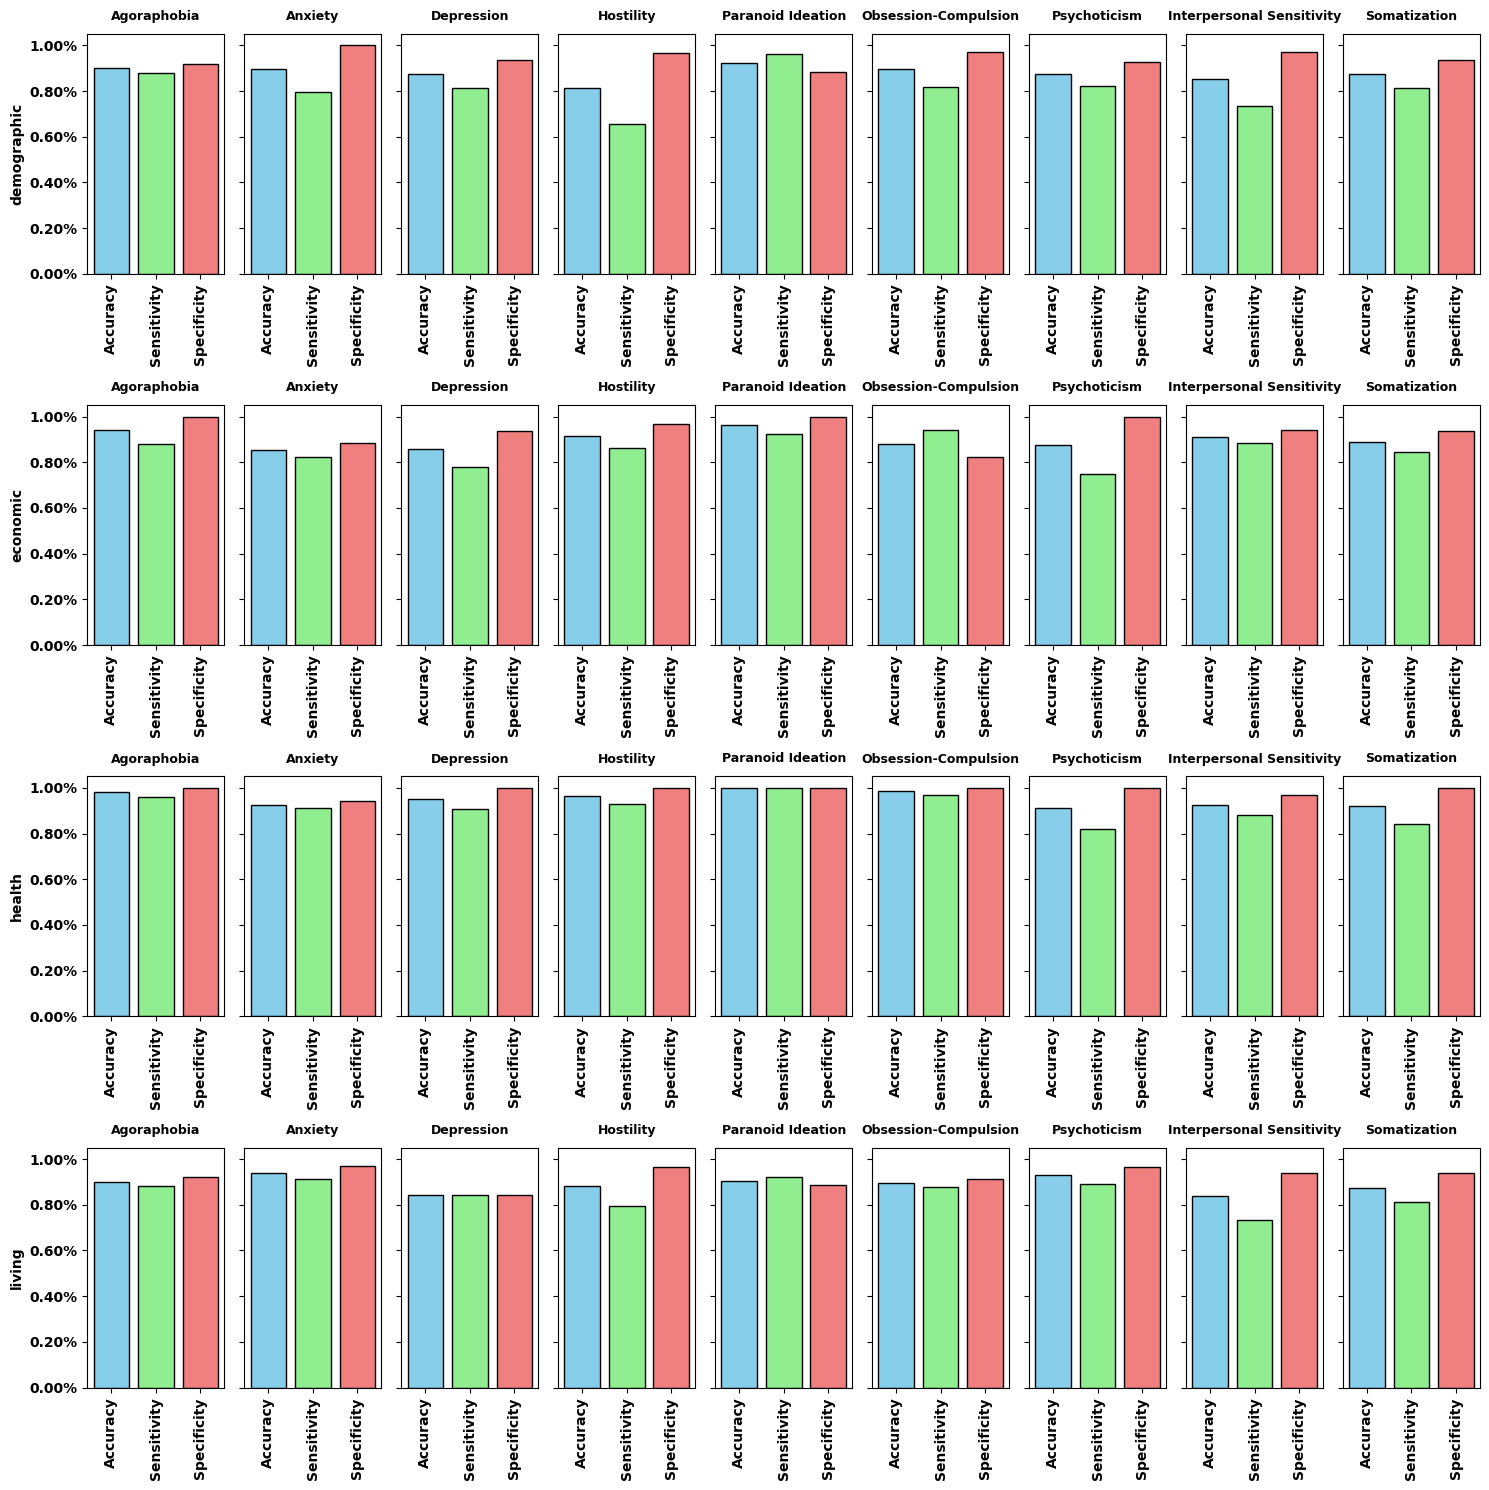

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Diccionario de traducciones manuales
traduccion_etiquetas = {
    'Agorafobia': 'Agoraphobia',  # Añadir tus traducciones aquí
    'Ansiedad': 'Anxiety',  # Añadir tus traducciones aquí
    'Depresión': 'Depression',  # Añadir tus traducciones aquí
    'Hostilidad': 'Hostility',  # Añadir tus traducciones aquí
    'Ideación paranoide': 'Paranoid Ideation',  # Añadir tus traducciones aquí
    'Obsesión-compulsión': 'Obsession-Compulsion',  # Añadir tus traducciones aquí
    'Psicoticismo': 'Psychoticism',  # Añadir tus traducciones aquí
    'Sensibilidad interpersonal': 'Interpersonal Sensitivity',  # Añadir tus traducciones aquí
    'Somatización': 'Somatization'  # Añadir tus traducciones aquí
    # Añadir más etiquetas según sea necesario
}

# Número de subsets y etiquetas
subsets = list(diccionario_resultado.keys())
etiquetas = list(diccionario_resultado[subsets[0]].keys())  # Asumimos que todos los subsets tienen las mismas etiquetas

# Definir el número de filas y columnas para los subgráficos
n_filas = len(subsets)
n_columnas = len(etiquetas)

# Crear el gráfico grande con subgráficos
fig, ax = plt.subplots(n_filas, n_columnas, figsize=(15, 15), sharey=True)

# Colores para cada métrica
colors = ['skyblue', 'lightgreen', 'lightcoral']
metricas_display = ['Accuracy', 'Sensitivity', 'Specificity']

# Encontrar el valor máximo y mínimo para las métricas, para usar la misma escala en todos los subgráficos
all_values = []
for subset in subsets:
    for etiqueta in etiquetas:
        metrics = diccionario_resultado[subset][etiqueta]
        all_values.extend([metrics['Accuracy Test'], metrics['Mean Sensibilidad Test'], metrics['Mean Especificidad Test']])

# Recorrer los subsets y las etiquetas para llenar los subgráficos
for i, subset in enumerate(subsets):
    for j, etiqueta in enumerate(etiquetas):
        # Obtener las métricas para esta combinación de subset y etiqueta
        metrics = diccionario_resultado[subset][etiqueta]
        mean_train_accuracy = metrics['Accuracy Test']
        mean_val_accuracy = metrics['Mean Sensibilidad Test']
        accuracy_test = metrics['Mean Especificidad Test']
        
        # Valores de las métricas
        valores_metricas = [mean_train_accuracy, mean_val_accuracy, accuracy_test]

        # Posición del subgráfico para este subset y etiqueta
        ax[i, j].bar(metricas_display, valores_metricas, color=colors, edgecolor='black')
        
        # Usar el diccionario de traducción para obtener el nombre de la etiqueta en inglés
        etiqueta_traducida = traduccion_etiquetas.get(etiqueta, etiqueta)  # Si no hay traducción, usa la etiqueta original

        # Título del subgráfico con la etiqueta traducida
        ax[i, j].set_title(f'{etiqueta_traducida}', fontsize=9, pad=10)

        # Etiquetas de los ejes
        #ax[i, j].set_xlabel('Métricas', fontsize=7)
        ax[i, j].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje X para mejor visibilidad
        if j == 0:  # Solo en la primera columna, agregar las etiquetas del eje Y
            ax[i, j].set_ylabel(f'{subset}', fontsize=10)

        # Establecer formato de porcentaje en el eje Y
        ax[i, j].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))

# Ajustar espacio entre los subgráficos y el gráfico en general
plt.tight_layout()

# Mostrar el gráfico grande con todos los subgráficos
plt.show()


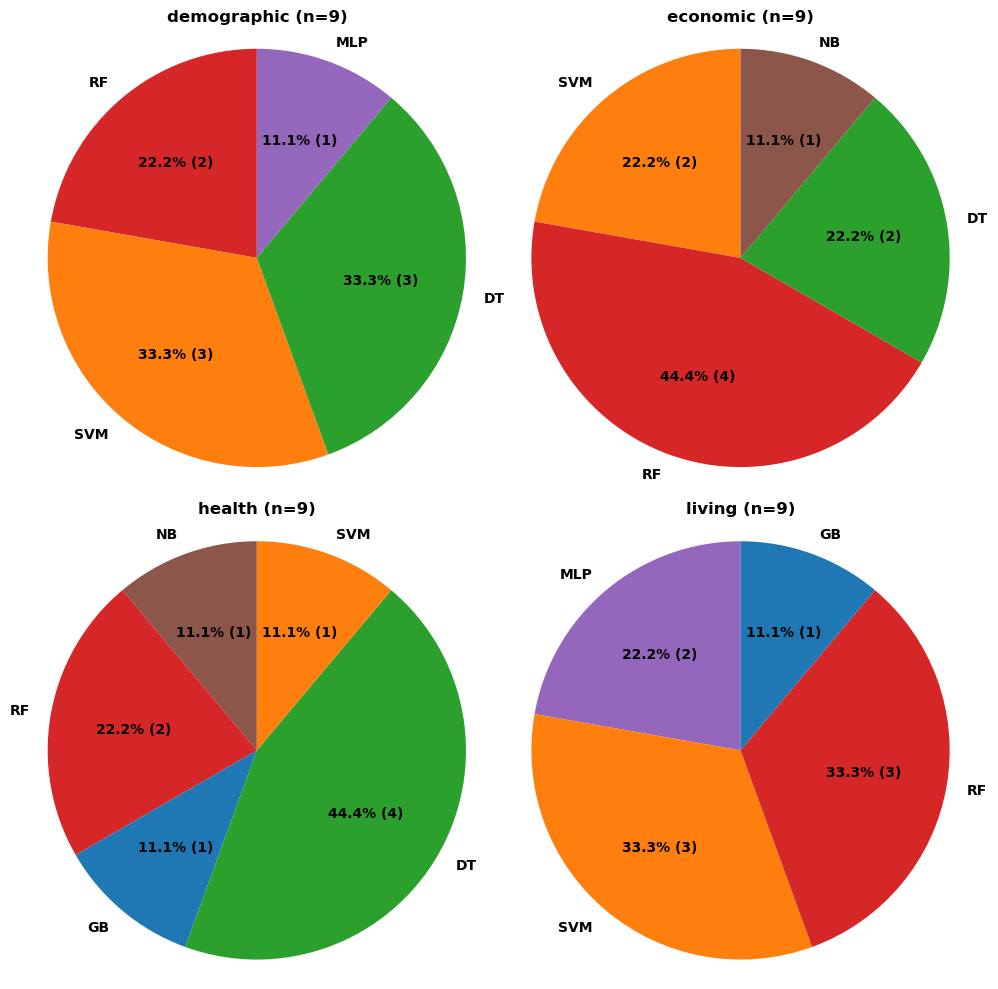

In [5]:
import matplotlib.pyplot as plt
import math

# Diccionario de traducción de algoritmos (puedes añadir tus traducciones manualmente)
traducciones_algoritmos = {
    'DecisionTree': 'DT',  # Ejemplo de traducción
    'GradientBoosting': 'GB',
    'NaiveBayes': 'NB',
    'RandomForest': 'RF'
}

# Función para contar la distribución de algoritmos en cada subset
def contar_algoritmos(diccionario_resultado):
    distribucion = {}
    
    # Recorrer el diccionario por subset y etiqueta
    for subset, etiquetas in diccionario_resultado.items():
        algoritmo_counts = {}  # Diccionario para contar los algoritmos en cada subset
        
        for etiqueta, metrics in etiquetas.items():
            algoritmo = metrics['Algoritmo']
            
            # Contar las veces que aparece cada algoritmo
            if algoritmo not in algoritmo_counts:
                algoritmo_counts[algoritmo] = 1
            else:
                algoritmo_counts[algoritmo] += 1
        
        distribucion[subset] = algoritmo_counts  # Guardar la distribución de algoritmos por subset
    
    return distribucion

# Llamar a la función para obtener la distribución de algoritmos por subset
distribucion_algoritmos = contar_algoritmos(diccionario_resultado)

# Lista de colores únicos para los algoritmos (los colores deben ser los mismos en todos los gráficos)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear un mapeo entre los algoritmos y colores
algoritmos = set()  # Usamos un set para evitar duplicados
for subset, algoritmo_counts in distribucion_algoritmos.items():
    algoritmos.update(algoritmo_counts.keys())  # Agregar los algoritmos a la lista

# Asignar un color único a cada algoritmo
color_dict = {algoritmo: colores[i % len(colores)] for i, algoritmo in enumerate(algoritmos)}

# Número de subsets
n_subsets = len(distribucion_algoritmos)

# Calcular el número de filas y columnas para los subgráficos
# Usamos la raíz cuadrada del número de subsets y redondeamos hacia arriba
n_filas = math.ceil(math.sqrt(n_subsets))
n_columnas = math.ceil(n_subsets / n_filas)

# Crear el gráfico de tarta para cada subset en una sola figura con subgráficos
fig, ax = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

# Si solo hay un subset, aseguramos que ax sea una lista
if n_filas == 1 and n_columnas == 1:
    ax = [ax]
elif n_filas == 1:
    ax = [ax[i] for i in range(n_columnas)]
elif n_columnas == 1:
    ax = [ax[i] for i in range(n_filas)]

# Crear el gráfico de tarta para cada subset
for i, (subset, algoritmo_counts) in enumerate(distribucion_algoritmos.items()):
    # Datos para el gráfico de tarta
    labels = list(algoritmo_counts.keys())  # Nombres de los algoritmos
    sizes = list(algoritmo_counts.values())  # Cantidades de cada algoritmo
    
    # Traducir los algoritmos utilizando el diccionario de traducción
    translated_labels = []
    for algoritmo in labels:
        # Normalizar el nombre del algoritmo para evitar problemas con mayúsculas, espacios, etc.
        translated_label = traducciones_algoritmos.get(algoritmo.strip(), algoritmo)
        translated_labels.append(translated_label)
    
    # Asignar colores usando el mapeo de colores
    colores_asignados = [color_dict[algoritmo] for algoritmo in labels]
    
    # Determinar el número total de instancias en el subset
    total_instancias = sum(sizes)
    
    # Función para mostrar tanto porcentaje como número de instancias en el gráfico
    def formato_pie(pct, allsizes=sizes):
        absolute = int(pct / 100.*sum(allsizes))  # Calcula el número de instancias
        return f"{pct:.1f}% ({absolute})"

    # Determinar la posición del gráfico en la cuadrícula de subgráficos
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Crear el gráfico de tarta
    ax[fila, columna].pie(sizes, labels=translated_labels, autopct=lambda pct: formato_pie(pct), startangle=90, colors=colores_asignados)
    ax[fila, columna].axis('equal')  # Asegura que la tarta sea un círculo
    
    # Título del gráfico
    ax[fila, columna].set_title(f'{subset} (n={total_instancias})', fontsize=12)
    
# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


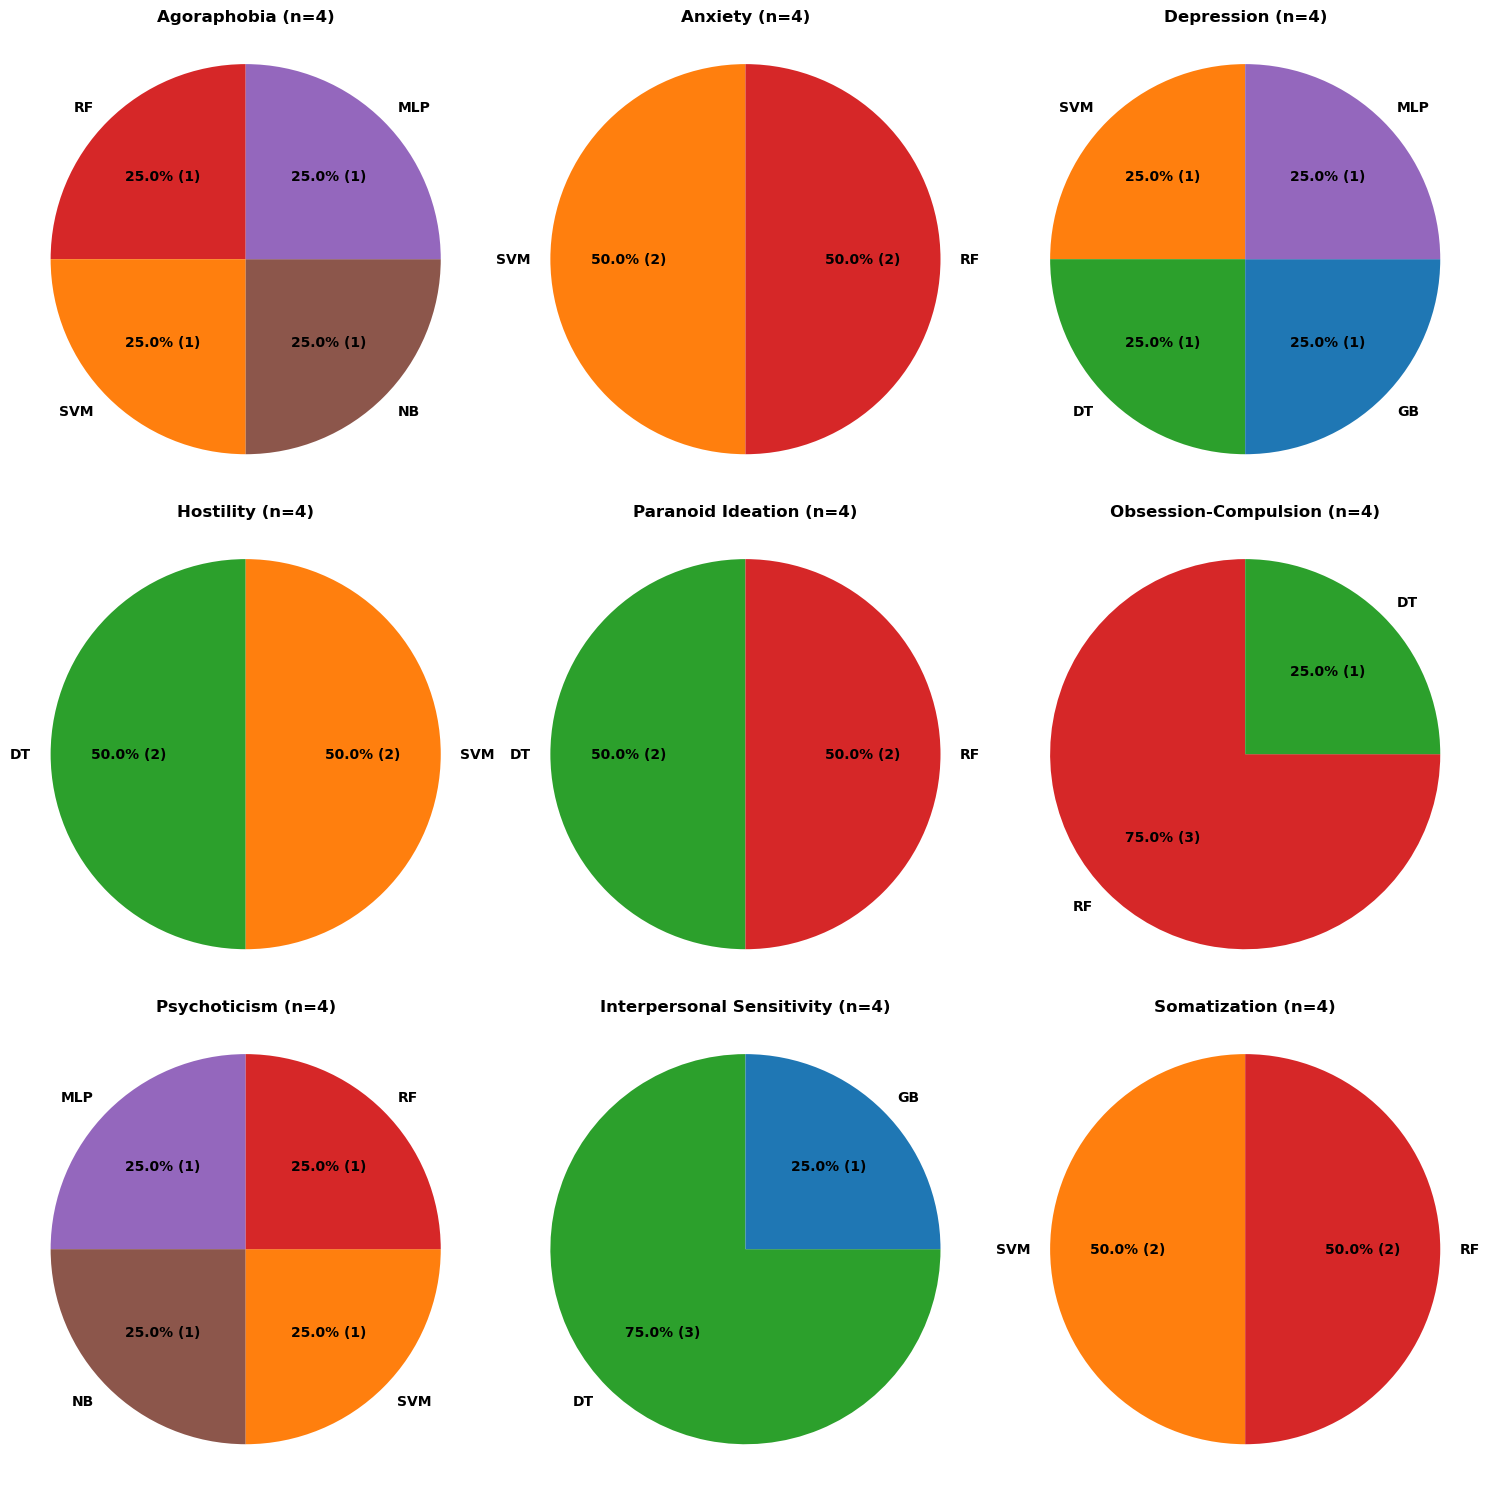

In [6]:
import matplotlib.pyplot as plt
import math

# Diccionario de traducción de etiquetas (agregado para traducir las etiquetas)
traduccion_etiquetas = {
    'Agorafobia': 'Agoraphobia',  # Añadir tus traducciones aquí
    'Ansiedad': 'Anxiety',  # Añadir tus traducciones aquí
    'Depresión': 'Depression',  # Añadir tus traducciones aquí
    'Hostilidad': 'Hostility',  # Añadir tus traducciones aquí
    'Ideación paranoide': 'Paranoid Ideation',  # Añadir tus traducciones aquí
    'Obsesión-compulsión': 'Obsession-Compulsion',  # Añadir tus traducciones aquí
    'Psicoticismo': 'Psychoticism',  # Añadir tus traducciones aquí
    'Sensibilidad interpersonal': 'Interpersonal Sensitivity',  # Añadir tus traducciones aquí
    'Somatización': 'Somatization'  # Añadir tus traducciones aquí
    # Añadir más etiquetas según sea necesario
}

# Diccionario de traducción de algoritmos
traducciones_algoritmos = {
    'DecisionTree': 'DT',  # Ejemplo de traducción
    'GradientBoosting': 'GB',
    'NaiveBayes': 'NB',
    'RandomForest': 'RF'
}

# Función para contar la distribución de algoritmos en cada etiqueta
def contar_algoritmos_por_etiqueta(diccionario_resultado):
    distribucion = {}
    
    # Recorrer el diccionario por subset y etiqueta
    for subset, etiquetas in diccionario_resultado.items():
        for etiqueta, metrics in etiquetas.items():
            algoritmo = metrics['Algoritmo']
            
            # Si la etiqueta no está en el diccionario, inicializamos
            if etiqueta not in distribucion:
                distribucion[etiqueta] = {}
            
            # Contar las veces que aparece cada algoritmo
            if algoritmo not in distribucion[etiqueta]:
                distribucion[etiqueta][algoritmo] = 1
            else:
                distribucion[etiqueta][algoritmo] += 1
    
    return distribucion

# Llamar a la función para obtener la distribución de algoritmos por etiqueta
distribucion_algoritmos_por_etiqueta = contar_algoritmos_por_etiqueta(diccionario_resultado)

# Lista de colores únicos para los algoritmos
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear un mapeo entre los algoritmos y colores
algoritmos = set()  # Usamos un set para evitar duplicados
for etiqueta, algoritmo_counts in distribucion_algoritmos_por_etiqueta.items():
    algoritmos.update(algoritmo_counts.keys())  # Agregar los algoritmos a la lista

# Asignar un color único a cada algoritmo
color_dict = {algoritmo: colores[i % len(colores)] for i, algoritmo in enumerate(algoritmos)}

# Número de etiquetas
n_etiquetas = len(distribucion_algoritmos_por_etiqueta)

# Calcular el número de filas y columnas para los subgráficos
# Usamos la raíz cuadrada del número de etiquetas y redondeamos hacia arriba
n_filas = math.ceil(math.sqrt(n_etiquetas))
n_columnas = math.ceil(n_etiquetas / n_filas)

# Crear el gráfico de tarta para cada etiqueta en una sola figura con subgráficos
fig, ax = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

# Si solo hay un gráfico, aseguramos que ax sea una lista
if n_filas == 1 and n_columnas == 1:
    ax = [ax]
elif n_filas == 1:
    ax = [ax[i] for i in range(n_columnas)]
elif n_columnas == 1:
    ax = [ax[i] for i in range(n_filas)]

# Crear el gráfico de tarta para cada etiqueta
for i, (etiqueta, algoritmo_counts) in enumerate(distribucion_algoritmos_por_etiqueta.items()):
    # Traducir la etiqueta utilizando el diccionario de traducción
    translated_etiqueta = traduccion_etiquetas.get(etiqueta, etiqueta)
    
    # Datos para el gráfico de tarta
    labels = list(algoritmo_counts.keys())  # Nombres de los algoritmos
    sizes = list(algoritmo_counts.values())  # Cantidades de cada algoritmo
    
    # Traducir los algoritmos utilizando el diccionario de traducción
    translated_labels = [traducciones_algoritmos.get(algoritmo.strip(), algoritmo) for algoritmo in labels]
    
    # Asignar colores usando el mapeo de colores
    colores_asignados = [color_dict[algoritmo] for algoritmo in labels]
    
    # Determinar el número total de instancias en la etiqueta
    total_instancias = sum(sizes)
    
    # Función para mostrar tanto porcentaje como número de instancias en el gráfico
    def formato_pie(pct, allsizes=sizes):
        absolute = int(pct / 100. * sum(allsizes))  # Calcula el número de instancias
        return f"{pct:.1f}% ({absolute})"

    # Determinar la posición del gráfico en la cuadrícula de subgráficos
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Crear el gráfico de tarta
    ax[fila, columna].pie(sizes, labels=translated_labels, autopct=lambda pct: formato_pie(pct), startangle=90, colors=colores_asignados)
    ax[fila, columna].axis('equal')  # Asegura que la tarta sea un círculo
    
    # Título del gráfico
    ax[fila, columna].set_title(f'{translated_etiqueta} (n={total_instancias})', fontsize=12)
    
# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
